In [2]:
from seagul.rl.ars.ars_pipe import ars
from seagul.nn import MLP
import torch
import matplotlib.pyplot as plt
from seagul.mesh import variation_dim
import time
import copy
import gym


import xarray as xr
import numpy as np
import pandas as pd

import os

In [3]:
def identity(rews,obs,acts):
    return rews

def vardiv(rews, obs, acts):
    return rews/variation_dim(obs)

def varmul(rews, obs, acts):
    return rews*variation_dim(obs)

def rough_measure(x):
    d = torch.stack([x[t,:] - x[t-1,:] for t in range(1,x.shape[0])])
    return d.std()#$/(torch.abs(d.mean()))

def rmul(rews, obs, acts):
    return rews*rough_measure(obs)

def rdiv(rews, obs, acts):
    return rews/rough_measure(obs)




In [4]:
env_names = ["HalfCheetah-v2", "Walker2d-v2", "Hopper-v2", "Swimmer-v2"]
post_fns = [identity, rmul, rdiv, varmul, vardiv]
save_dir = "./data2/"
os.makedirs(save_dir)

torch.set_default_dtype(torch.float64)
num_experiments = len(post_fns)
num_seeds = 20
num_epochs = 600
n_workers = 24; n_delta = 60; n_top = 20

import time
start = time.time()

for env_name in env_names:
        env = gym.make(env_name)
        in_size = env.observation_space.shape[0]
        out_size = env.action_space.shape[0]
        policy_dict =  {fn.__name__:[] for fn in post_fns}
        
        rewards = xr.DataArray(np.zeros((num_experiments, num_seeds, num_epochs)),
                    dims = ("post", "trial", "epoch"),
                    coords = {"post": [fn.__name__ for fn in post_fns]})

        post_rewards = xr.DataArray(np.zeros((num_experiments, num_seeds, num_epochs)),
                    dims = ("post", "trial", "epoch"),
                    coords = {"post": [fn.__name__ for fn in post_fns]})

        data = xr.Dataset({
            "rews" : rewards,
            "post_rews" : post_rewards},
            coords = {"post": [fn.__name__ for fn in post_fns]},
            attrs  = {"policy_dict":policy_dict, "post_fns":post_fns, "env_name":env_name})

        for post_fn in post_fns:
            for i in range(num_seeds ):
                policy = MLP(in_size,out_size,0,0)
                policy, r_hist, lr_hist = ars(env_name, policy, num_epochs, n_workers=n_workers, n_delta=n_delta, n_top=n_top, postprocess=post_fn)
                print(i, time.time() - start)
                data.policy_dict[post_fn.__name__].append(copy.deepcopy(policy))
                data.rews.loc[post_fn.__name__,i,:] = lr_hist
                data.post_rews.loc[post_fn.__name__,i,:] = r_hist
               
                
        torch.save(data, f"{save_dir}{env_name}.xr")


running build_ext


Process Process-23:
Process Process-9:
Process Process-17:
Process Process-4:
Process Process-10:
Process Process-22:
Process Process-13:
Process Process-3:
Process Process-11:
Process Process-20:
Process Process-24:
Process Process-1:
Process Process-21:
Process Process-2:
Process Process-5:
Process Process-14:
Process Process-18:
Process Process-12:
Process Process-16:
Process Process-8:
Process Process-15:
Process Process-7:
Process Process-6:
Process Process-19:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Trac

KeyboardInterrupt: 

  File "/home/sgillen/miniconda3/envs/baselines/lib/python3.6/site-packages/torch/nn/modules/linear.py", line 87, in forward
    return F.linear(input, self.weight, self.bias)
KeyboardInterrupt
  File "/home/sgillen/miniconda3/envs/baselines/lib/python3.6/site-packages/gym/wrappers/time_limit.py", line 31, in step
    observation, reward, done, info = self.env.step(action)
  File "/home/sgillen/miniconda3/envs/baselines/lib/python3.6/site-packages/gym/envs/mujoco/mujoco_env.py", line 99, in do_simulation
    self.sim.data.ctrl[:] = ctrl
  File "/home/sgillen/miniconda3/envs/baselines/lib/python3.6/site-packages/gym/envs/mujoco/half_cheetah.py", line 15, in step
    reward_ctrl = - 0.1 * np.square(action).sum()
  File "/home/sgillen/miniconda3/envs/baselines/lib/python3.6/site-packages/torch/tensor.py", line 494, in __array__
    return self.numpy().astype(dtype, copy=False)
  File "/home/sgillen/work/seagul/seagul/nn.py", line 156, in forward
    return self.output_activation(self.outp

In [6]:
data.rews

<xarray.DataArray 'rews' (Experiment: 2, Trial: 20, Epoch: 100)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * Experiment  (Experiment) <U8 'standard' 'rmul'
Dimensions without coordinates: Trial, Epoch

In [5]:
new_data = torch.load("./data/HalfCheetah-v2.xr")

policy_dict = torch.load("./data/mjw_longermul.pol_dict")

/home/sgillen/miniconda3/envs/baselines/lib/python3.6/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/sgillen/miniconda3/envs/baselines/lib/python3.6/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


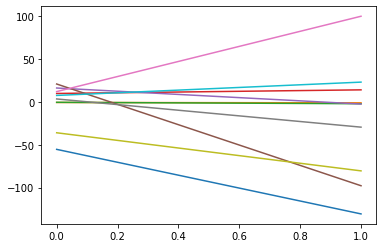

In [45]:
plt.plot(new_data.rews.loc['rmul'])

In [6]:
def do_rollout(env, policy, render=False):
    torch.autograd.set_grad_enabled(False)

    act_list = []
    obs_list = []
    rew_list = []

    dtype = torch.float32
    obs = env.reset()
    done = False
    cur_step = 0

    while not done:
        obs = torch.as_tensor(obs, dtype=dtype).detach()
        obs_list.append(obs.clone())

        act = policy(obs)
        obs, rew, done, _ = env.step(act.numpy())
        if render:
            env.render()
            time.sleep(.02)

        act_list.append(torch.as_tensor(act.clone()))
        rew_list.append(rew)

        cur_step += 1

    ep_length = len(rew_list)
    ep_obs = torch.stack(obs_list)
    ep_act = torch.stack(act_list)
    ep_rew = torch.tensor(rew_list, dtype=dtype)
    ep_rew = ep_rew.reshape(-1, 1)

    torch.autograd.set_grad_enabled(True)
    return ep_obs, ep_act, ep_rew, ep_length

In [8]:
env_name = "Walker2d-v2"


policy = policy_dict['standard'][2]
env = gym.make(env_name)
o,a,r,l = do_rollout(env, policy, render=False)

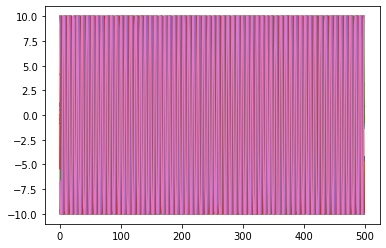

In [9]:
start_idx = 500
plt.plot(o[start_idx:])
target = o[start_idx:]

In [10]:
from seagul.mesh import create_mesh, variation_dim, mesh_dim

In [121]:
m,w = create_mesh(target,.1)
len(m)

500

In [122]:
mdim, _, _ = mesh_dim(target, .1)
cdim, _, _ = mesh_dim(target, .1)
vdim = variation_dim(target)

print(mdim, cdim, vdim)

1.384128746952849 1.384128746952849 0.999494555836125


In [13]:
init_d = 1e-6
num_runs = 1

mdims = xr.DataArray(np.zeros((len(post_fns), num_seeds, num_runs)),
                dims = ("post", "seed", "run"),
                coords = {"post": [fn.__name__ for fn in post_fns]})

cdims =  xr.DataArray(np.zeros((len(post_fns), num_seeds, num_runs)),
                dims = ("post", "seed", "run"),
                coords = {"post": [fn.__name__ for fn in post_fns]})

vdims = xr.DataArray(np.zeros((len(post_fns), num_seeds, num_runs)),
                dims = ("post", "seed", "run"),
                coords = {"post": [fn.__name__ for fn in post_fns]})

rdims =  xr.DataArray(np.zeros((len(post_fns), num_seeds, num_runs)),
                dims = ("post", "seed", "run"),
                coords = {"post": [fn.__name__ for fn in post_fns]})


for post_fn in post_fns:
    for i in range(num_seeds):
        for j in range(num_runs):
            policy = policy_dict[post_fn.__name__][i]
            o,a,r,l = do_rollout(env, policy, render=False)
            target = o[500:]
            m,w = create_mesh(target,init_d)
            assert(len(m) == len(target))

            mdims.loc[post_fn.__name__,i,j] , _, _ = mesh_dim(target, init_d)
            cdims.loc[post_fn.__name__,i,j], _, _ = mesh_dim(target, init_d)
            vdims.loc[post_fn.__name__,i,j] = variation_dim(target)
            rdims.loc[post_fn.__name__,i,j] = rough_measure(target).item()



KeyError: 'rdiv'

In [184]:
mdims.loc["rmul"].mean(dim='run').mean()

<xarray.DataArray ()>
array(1.20762723)
Coordinates:
    post     <U8 'rmul'

In [185]:
mdims.loc["identity"].mean(dim='run').mean()

<xarray.DataArray ()>
array(1.33039696)
Coordinates:
    post     <U8 'identity'